In [5]:
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.cluster import AgglomerativeClustering


# Euclidean distance

In [6]:
# initializing points in
# numpy arrays
p_1 = np.array([1, 2, 3])
p_2 = np.array([1, 1, 1])

# subtraction vectors
temp = p_1 - p_2

# dot product to find the sum of the squares 
# reminder the dot product multiplies every element of an array for the corrsponding element of another array and sums the products

sum_sq = np.dot(temp,temp)


dist = np.sqrt(sum_sq)


print(dist)

2.23606797749979


We can also define a function that does that for us really quickly

In [7]:
def e_dist(vector1, vector2):
    diff = vector1 - vector2
    return np.sqrt(np.dot(diff,diff))

e_dist(p_1, p_1)


0.0

# Cluster types

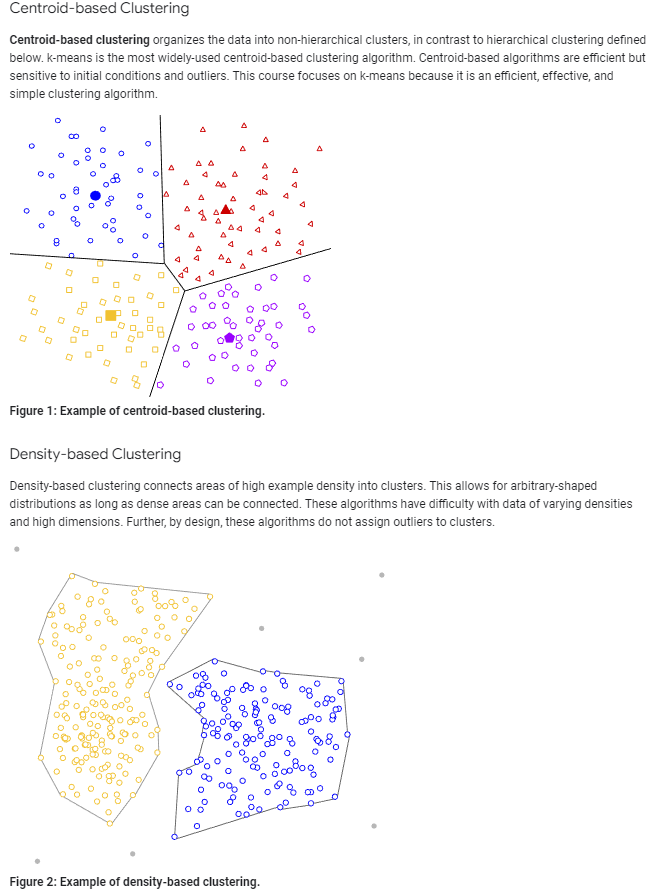

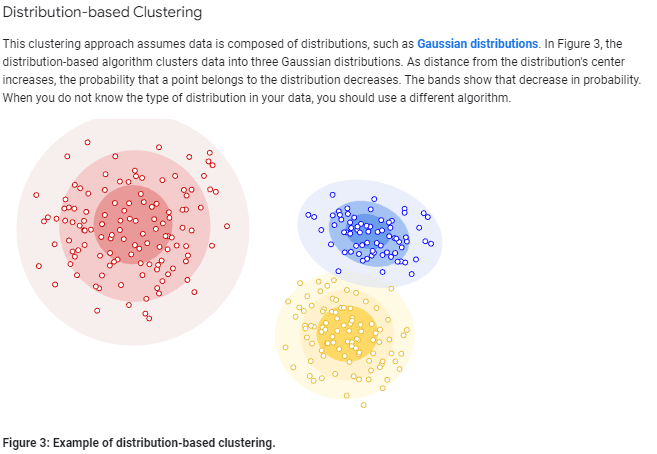

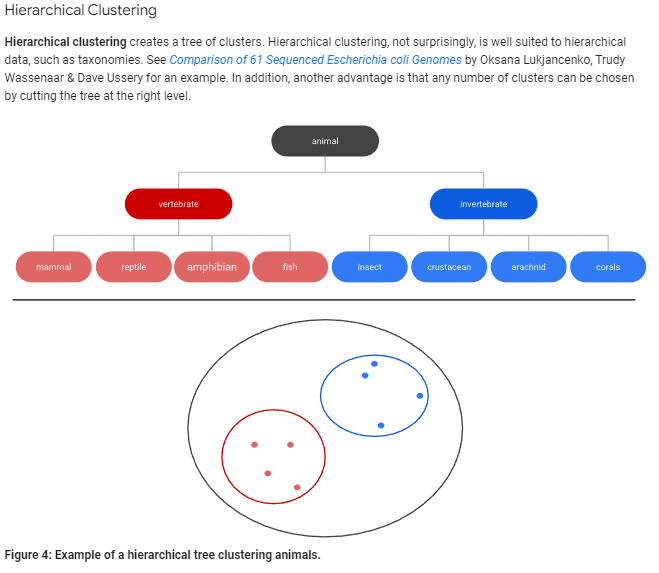

# Agglomerative CLustering

https://www.youtube.com/watch?v=7xHsRkOdVwo


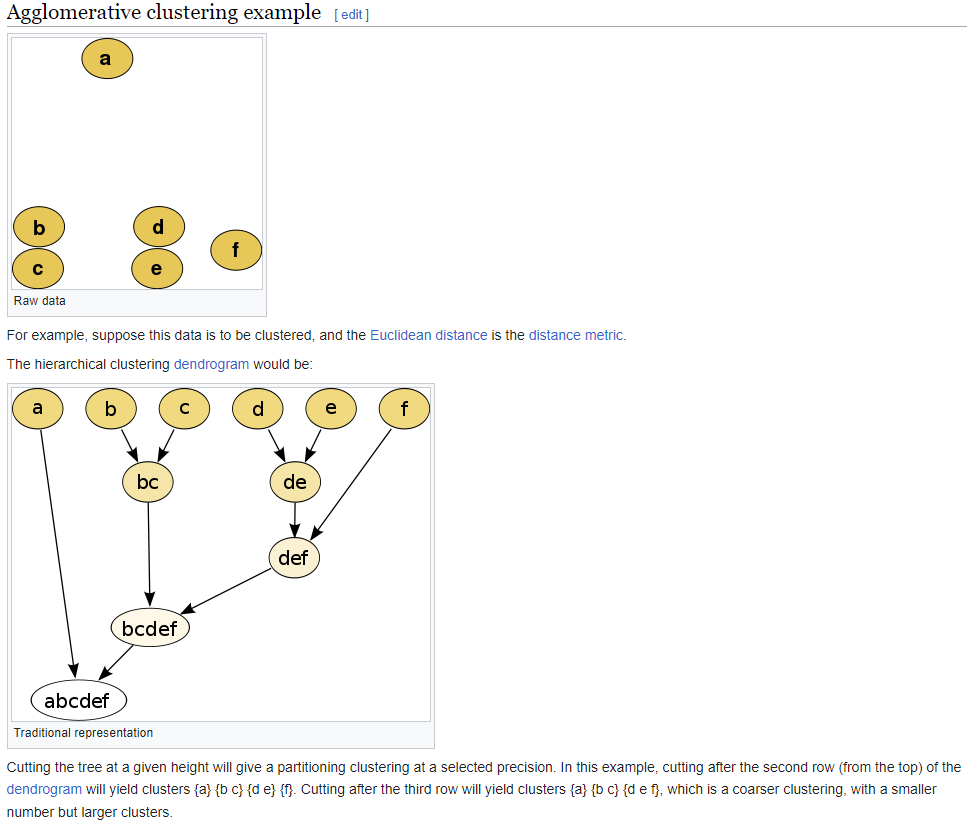

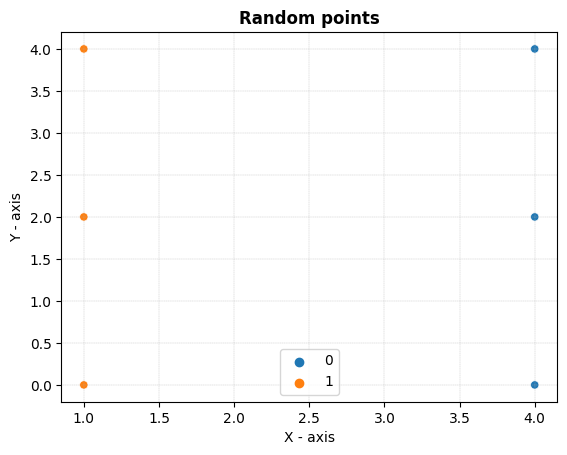

In [16]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])

# the syntax give that aou array is a matrix 2x6 means that we are taking first all the x values for the 0 column and than all the x values for the 1 column


# we us an in-build function to cluster the values
clustering = AgglomerativeClustering().fit(X)

# This give the values of the labels of our points
clustering.labels_

# We can tha nuse a scatter plot with that "hue " to see the results
sns.scatterplot(x = X[:,0], y = X[:,1], hue = clustering.labels_)
plt.title('Random points', fontsize = 12, fontweight = 'bold')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.grid(linestyle = '--', linewidth = 0.25)

# plt.scatter(x = X[:,0], y = X[:,1], c = clustering.labels_, cmap = 'coolwarm')


In [9]:
# We can check the label value for each of our points
clustering.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)

In [10]:
# We can check the number of cluster 
clustering.n_clusters


2

# K-Means Clustering

https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages

$f(\theta) = \sum_{i=1}^N \sum_{i=1}^K A_{nk}|| \theta_k - x_n||^2$ 

$\theta_k = \text{centroid of the }k^{th} \text{ cluster}$

$A_{nk} = 1\text{ when the } n^{th} \text{ point is assigned to the } n^{th} \text {cluster}$

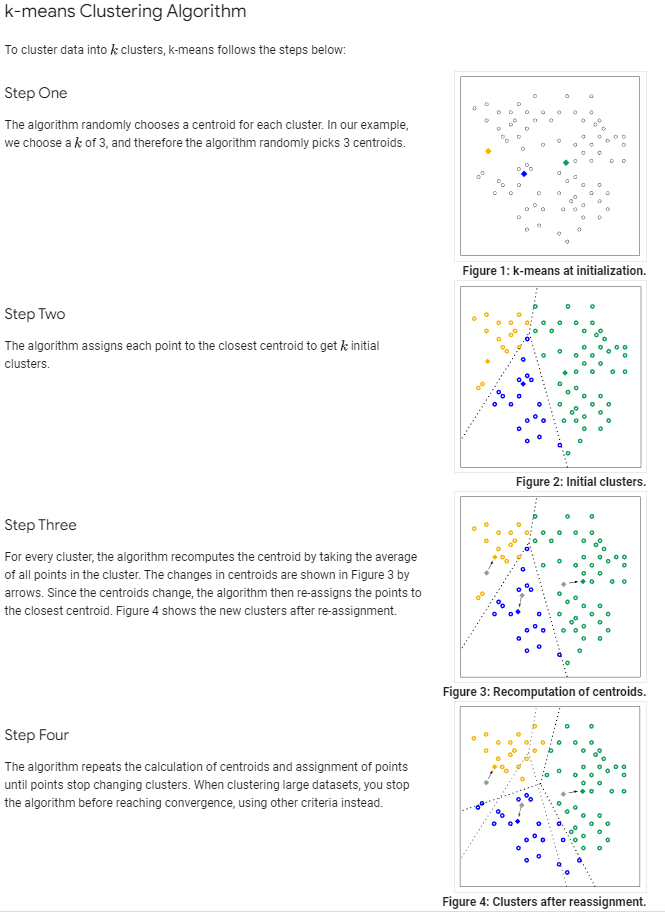

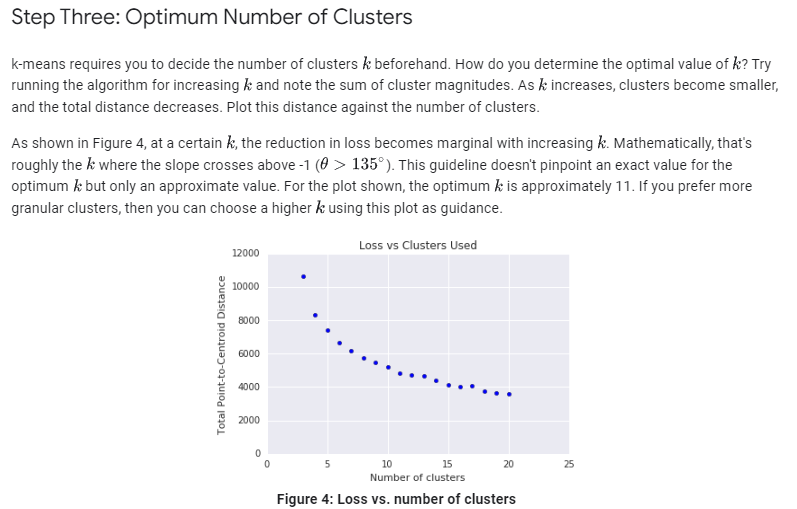

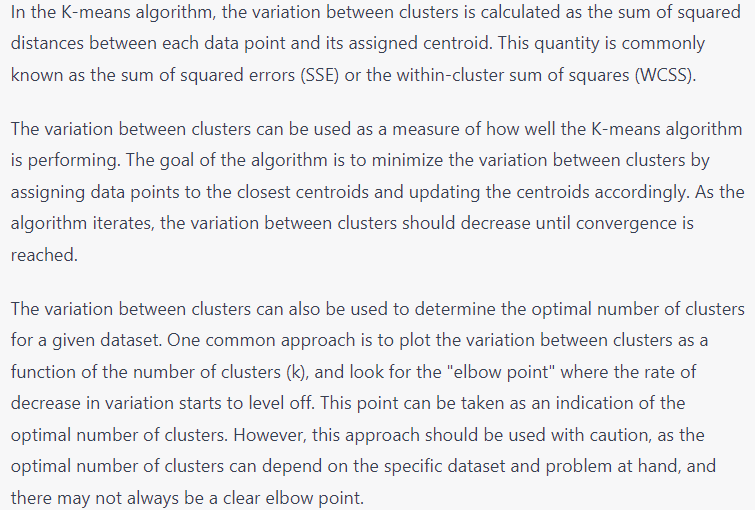




In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

The sklearn site with the description of the function:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

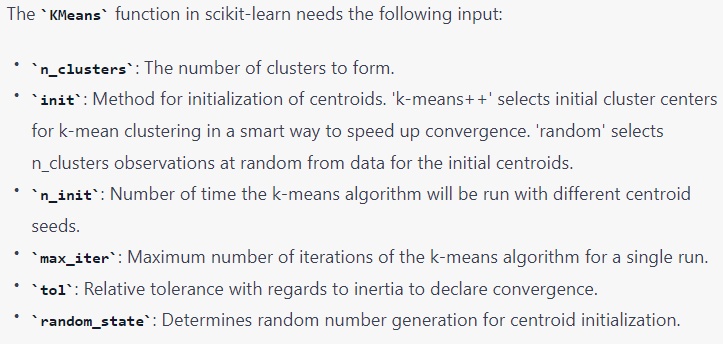

In [21]:
# sSo we are appling kmenas to cluster our data at the moment, lets see how it will look like
kmeans = KMeans(n_clusters=2, random_state= 0, n_init= 'auto').fit(X)

In [22]:
# As for the Clusterin.labels we can show the labels, as we can see they differ from our previus labesl
kmeans.labels_

array([1, 0, 1, 0, 0, 1])

In [23]:
# WE GAVE HIM TWO POINTS AND HE GIVES US A PREDICTION FOR THE LABELS OF THE TWO POINTS
kmeans.predict([[0, 0], [12,2]])

array([1, 0])

In [24]:
# It gives us the centroid of the clusters, can be useful , let's say we actually want to calculate the centroid for example
kmeans.cluster_centers_

array([[3.        , 3.33333333],
       [2.        , 0.66666667]])

Let's see the result of K-means compared to the agglomerative clusteringfrom before


We have a very different result, it is not very intuitive what we are getting to be honest i would not like this result


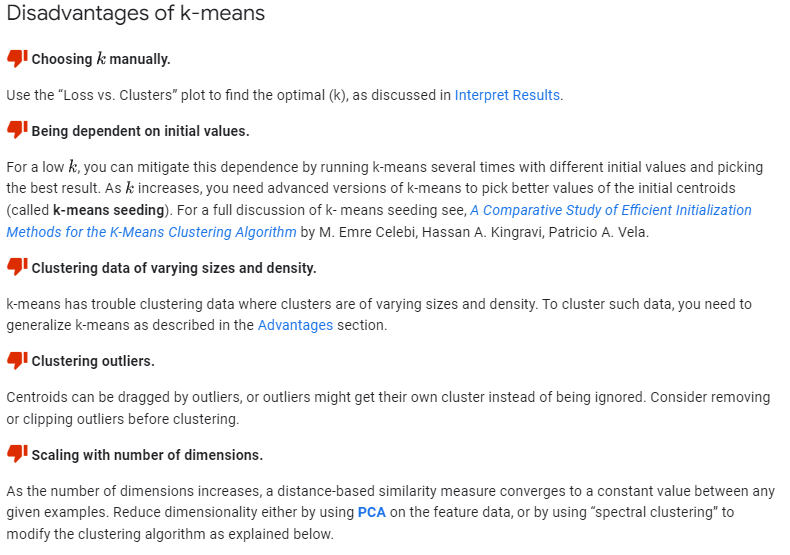

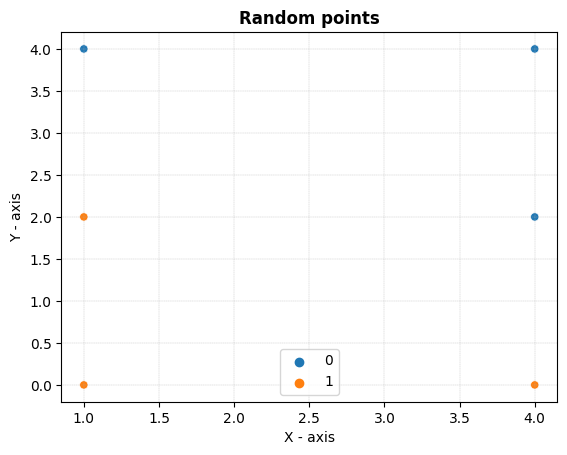

In [32]:
# We can tha nuse a scatter plot with that "hue " to see the results
sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmeans.labels_)
plt.title('Random points', fontsize = 12, fontweight = 'bold')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.grid(linestyle = '--', linewidth = 0.25)

# this is mainly because we are using the centroids and we are not actually comparing the point the other points but rather the point to their average (the centroids)
# On the other hand this algoritm is very quick